In [1]:
#read csv
import pandas as pd
import numpy as  np

df = pd.read_csv('atussum_0321.csv', header='infer')
df.head(2)

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import matplotlib.pyplot as plt

#categorize as per age - derived
def ageCondition(x):
    if x >  15 and x < 20: return "Teenage"
    elif x >= 20 and x < 40: return "Young"
    elif x >= 40 and x < 60: return "Adult"
    elif x >= 60 and x < 85: return "Senior Citizen"
df['AgeGroup'] = df['TEAGE'].apply(ageCondition)

df['AgeGroup'] = pd.Categorical(df['AgeGroup'], 
                                           categories=['Teenage', 'Young', 'Adult', 'Senior Citizen'])

df.head(2)

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989,AgeGroup
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,Senior Citizen
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,Adult


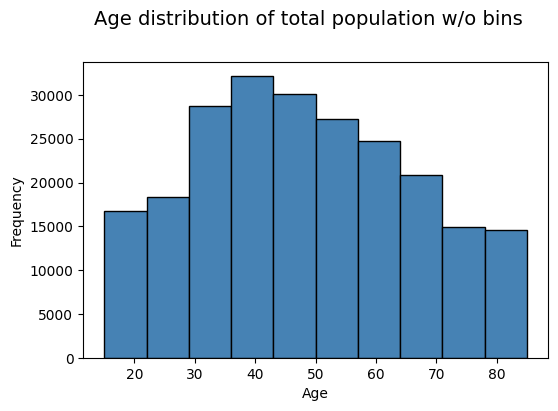

In [3]:
#Age distribution of total population w/o bins
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age distribution of total population w/o bins", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['TEAGE'], color='steelblue',
                                    edgecolor='black', linewidth=1)

<Figure size 600x400 with 0 Axes>

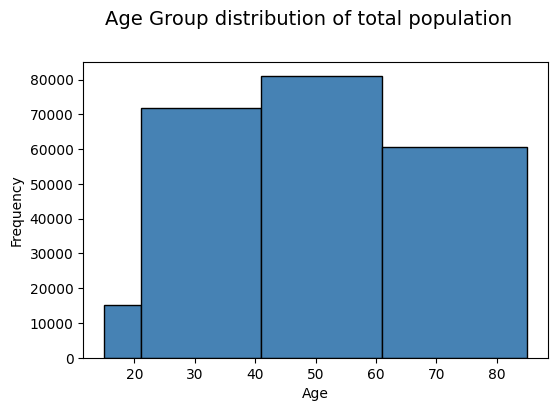

In [4]:
#Age group distribution of total population
#with customized bins, we can see there are not many samples for age group 15-20
fig = plt.figure(figsize = (6,4))
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age Group distribution of total population", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['TEAGE'], color='steelblue', bins=[15, 21, 41, 61, 85],
                                    edgecolor='black', linewidth=1)

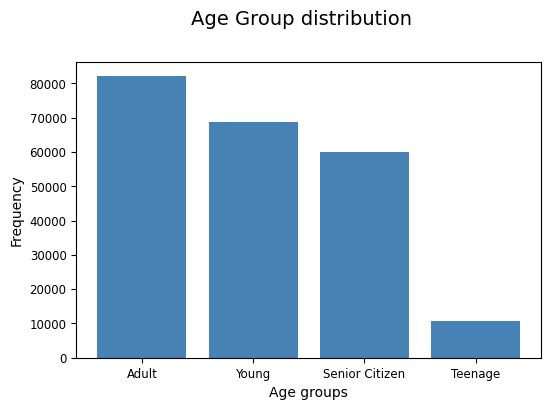

In [5]:
#treat age as categorical variables - better than earlier one where we manually defined beans. Rigth skewing more visible

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age Group distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age groups")
ax.set_ylabel("Frequency") 
df_age = df['AgeGroup'].value_counts()
df_age = (list(df_age.index), list(df_age.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(df_age[0], df_age[1], color='steelblue')



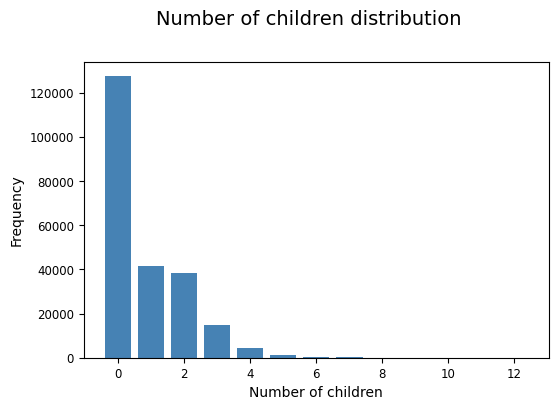

In [6]:
#number of children
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Number of children distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Number of children")
ax.set_ylabel("Frequency") 
df_num_children = df['TRCHILDNUM'].value_counts()
df_num_children = (list(df_num_children.index), list(df_num_children.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(df_num_children[0], df_num_children[1], color='steelblue')

#todo - zoom in for numchildren > 6 using subplot?

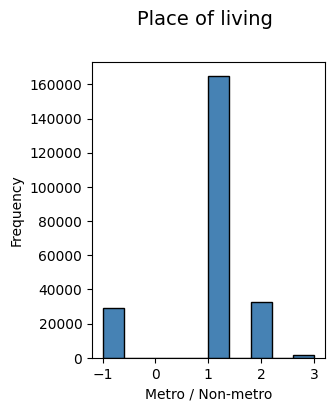

In [7]:
#metro / non-metro status
fig = plt.figure(figsize = (3, 4))
title = fig.suptitle("Place of living", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Metro / Non-metro")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['GTMETSTA'], color='steelblue',
                                    edgecolor='black', linewidth=1)
#todo - ignore 0,1 and 3 values here

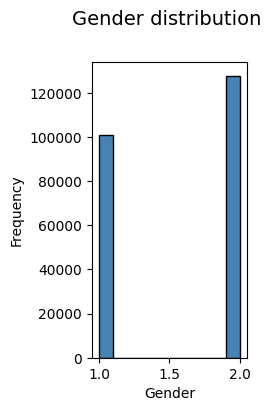

In [8]:
#gender distribution
fig = plt.figure(figsize = (2, 4))
title = fig.suptitle("Gender distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['TESEX'], color='steelblue',
                                    edgecolor='black', linewidth=1)
#todo - x-axis values as per values in list

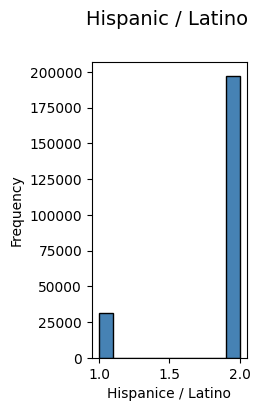

In [9]:
#gender distribution
fig = plt.figure(figsize = (2, 4))
title = fig.suptitle("Hispanic / Latino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Hispanice / Latino")
ax.set_ylabel("Frequency") 
freq, bins, patches = ax.hist(df['PEHSPNON'], color='steelblue',
                                    edgecolor='black', linewidth=1)
#todo - x-axis values as per values in list

In [10]:
#2d 
filtered_df = pd.read_csv('atussum_0321.csv', header='infer', usecols=["TESEX", "GTMETSTA", "TRCHILDNUM","PEHSPNON","TEAGE"])

# import matplotlib.pyplot as plt

# #categorize as per age - derived
# def ageCondition(x):
#     if x >  15 and x < 20: return "Teenage"
#     elif x >= 20 and x < 40: return "Young"
#     elif x >= 40 and x < 60: return "Adult"
#     elif x >= 60 and x < 85: return "Senior Citizen"
# filtered_df['AgeGroup'] = filtered_df['TEAGE'].apply(ageCondition)

# filtered_df['AgeGroup'] = pd.Categorical(filtered_df['AgeGroup'], 
#                                            categories=['Teenage', 'Young', 'Adult', 'Senior Citizen'])

# filtered_df.head(2)

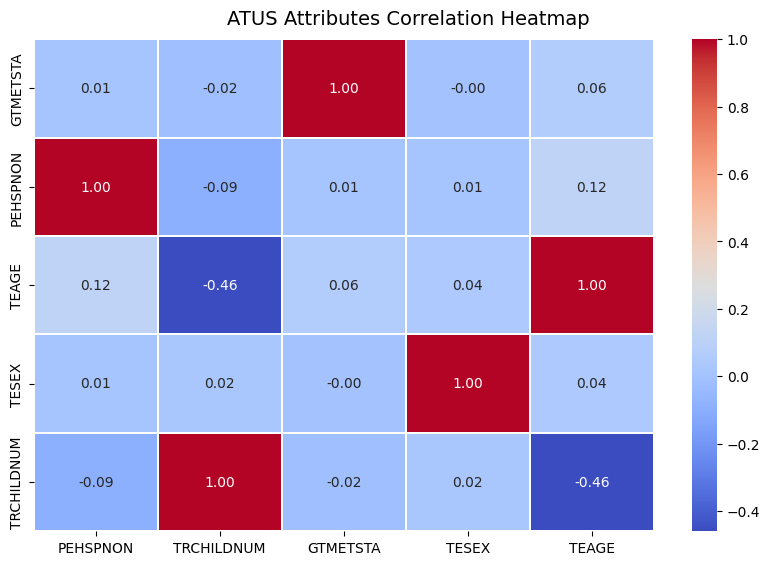

In [11]:
import seaborn as sns

cols = ['PEHSPNON', 'TRCHILDNUM', 'GTMETSTA', 'TESEX', 'TEAGE']

f, ax = plt.subplots(figsize=(10, 6))

corr = filtered_df.corr()[cols]
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ATUS Attributes Correlation Heatmap', fontsize=14)

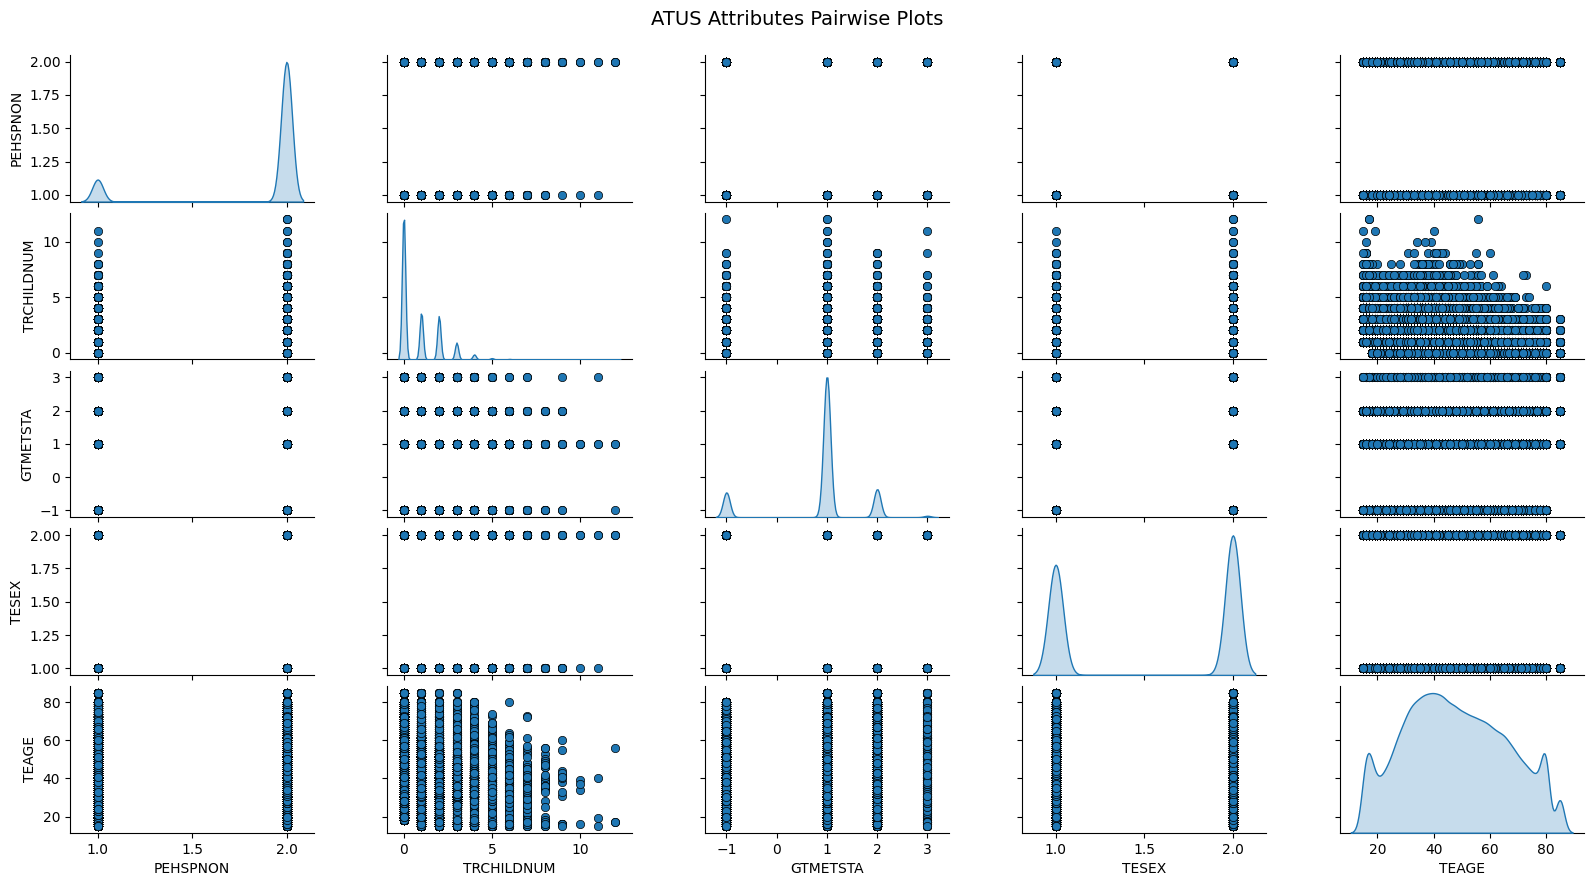

In [12]:
#pair wise scatter plot
#not needed?
pp = sns.pairplot(filtered_df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ATUS Attributes Pairwise Plots', fontsize=14)


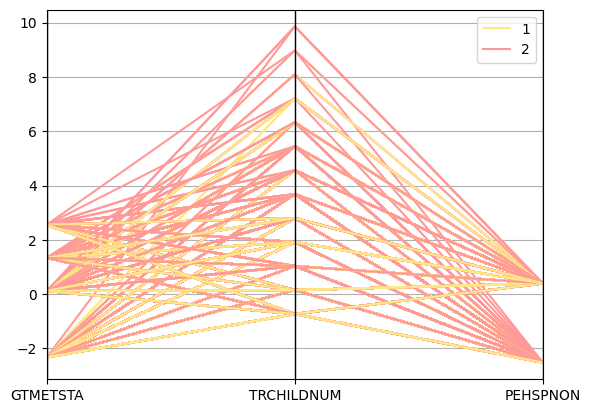

In [13]:
# Scaling attribute values to avoid few outiers
#not needed?
cols = ["GTMETSTA", "TRCHILDNUM","PEHSPNON"]
subset_df = filtered_df[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, filtered_df['TESEX']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'TESEX', color=('#FFE888', '#FF9999'))

In [ ]:
# #subplots are better to view 2D discrete variables and most of are variables are discrete only
# fig = plt.figure(figsize = (10, 4))
# title = fig.suptitle("Gender distribtuion as per place of living", fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax1 = fig.add_subplot(1,2, 1)
# ax1.set_title("Metro")
# #ax1.set_xlabel("Quality")
# ax1.set_ylabel("Frequency")
# df1 = filtered_df.query('GTMETSTA == 1')
# rw_q = df1['TESEX'].value_counts()
# rw_q = (list(rw_q.index), list(rw_q.values))
# # ax1.set_ylim([0, 2500])
# ax1.tick_params(axis='both', which='major', labelsize=8.5)
# bar1 = ax1.bar(rw_q[0], rw_q[1], color='red')


# ax2 = fig.add_subplot(1,2, 2)
# ax2.set_title("Non-metro")
# ax2.set_xlabel("Quality")
# ax2.set_ylabel("Frequency") 
# df2 = filtered_df.query('GTMETSTA == 2')
# rw_q = df2['TESEX'].value_counts()
# ww_q = (list(ww_q.index), list(ww_q.values))
# # ax2.set_ylim([0, 2500])
# ax2.tick_params(axis='both', which='major', labelsize=8.5)

# ax2.bar(ww_q[0], ww_q[1], color='#FFDC51')

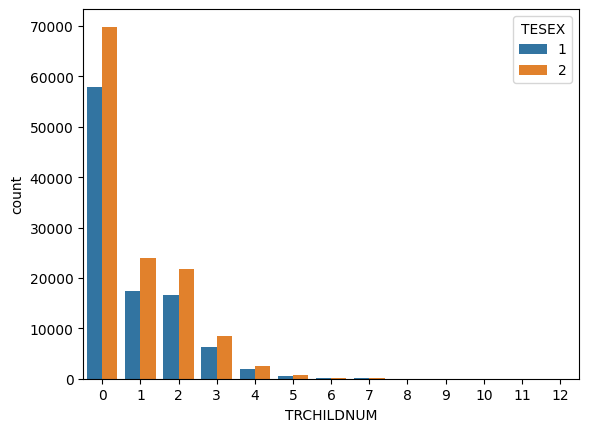

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df1 = pd.read_csv('atussum_0321.csv', header='infer', usecols=["TESEX", "GTMETSTA", "TRCHILDNUM","PEHSPNON","TEAGE"])


Text(0, 0.5, 'Number of children')

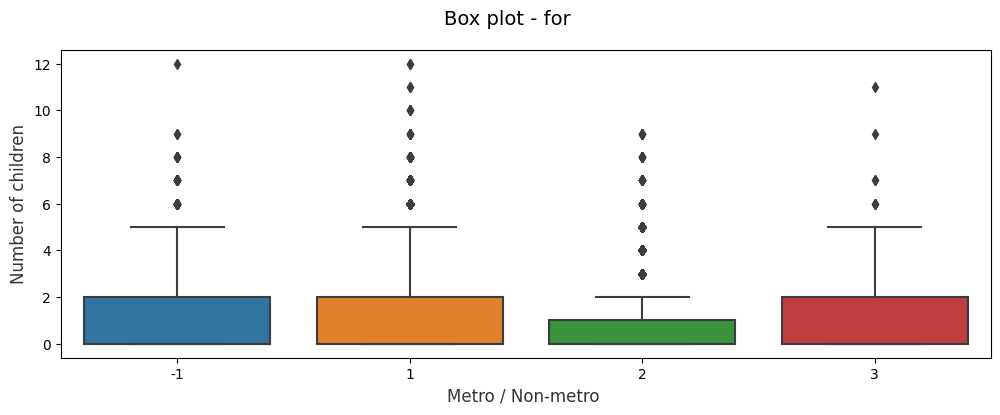

In [3]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Box plot - for showing how metro/non-metro affects number of children count ', fontsize=14)

sns.boxplot(x="GTMETSTA", y="TRCHILDNUM", data=filtered_df1,  ax=ax)
ax.set_xlabel("Metro / Non-metro",size = 12,alpha=0.8)
ax.set_ylabel("Number of children",size = 12,alpha=0.8)

Text(0, 0.5, 'Number of children')

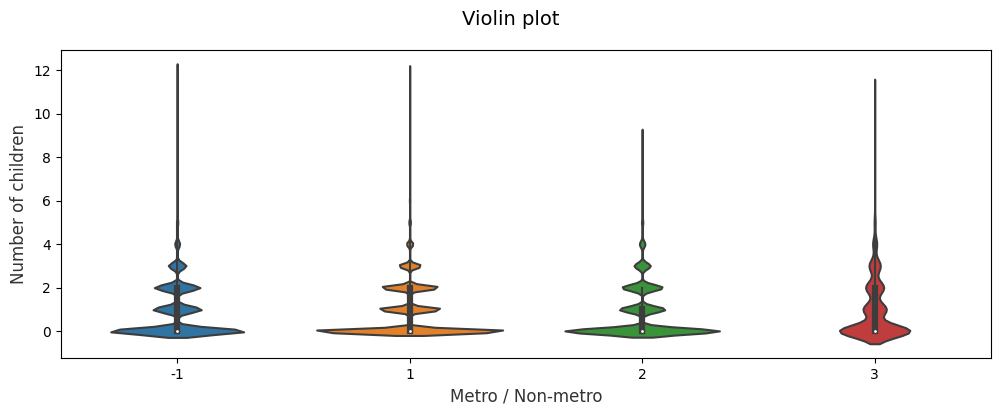

In [4]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Violin plot', fontsize=14)

sns.violinplot(x="GTMETSTA", y="TRCHILDNUM", data=filtered_df1,  ax=ax)
ax.set_xlabel("Metro / Non-metro",size = 12,alpha=0.8)
ax.set_ylabel("Number of children",size = 12,alpha=0.8)


In [ ]:
cols = ['PEHSPNON', 'TRCHILDNUM', 'GTMETSTA', 'TESEX', 'TEAGE']
pp = sns.pairplot(filtered_df1[cols], hue='TESEX', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [ ]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
# not very effective
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = filtered_df1['GTMETSTA']
ys = filtered_df1['TRCHILDNUM']
zs = filtered_df1['TESEX']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Metro / Non-metro')
ax.set_ylabel('Number of children')
ax.set_zlabel('Gender')


In [ ]:
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                size=wines['residual sugar'])

# using color for the 3rd dimension
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                hue=wines['residual sugar'], alpha=0.9)
